### Problem Statement:

Build a classification model to predict a person’s credit score category (Good, Standard, or Poor) based on financial and personal data.

### Key Goal:

* Clean Data
* Encode Categories
* Select Features
* Train Model
* Evaluate Model
* Extract Insights


### Why Is This Important?

It helps banks and lenders make informed decisions, reduce defaults, automate credit evaluations, and improve financial inclusion.

### Column Details:

* 1) ID Unique identifier for each customer (not useful for modeling).

* 2) Customer_ID Customer-specific ID (also typically not used in modeling).

* 3) Month The month of the record (could be useful for time-based analysis).

* 4) Name Customer’s name (not used for modeling).

* 5) Age Age of the customer.

* 6) SSN Social Security Number (sensitive; typically dropped).

* 7) Occupation Type of job (categorical feature).

* 8) Annual_Income Total annual income.

* 9) Monthly_Inhand_Salary Average monthly salary after tax deductions.

* 10) Num_Bank_Accounts Number of bank accounts held.

* 11) Num_Credit_Card Number of credit cards owned.

* 12) Interest_Rate Average interest rate on credit cards.

* 13) Num_of_Loan Total number of loans taken.

* 14) Type_of_Loan Categories/types of loans (possibly multi-label or text-based).

* 15) Delay_from_due_date Average number of days payments are delayed.

* 16) Num_of_Delayed_Payment Number of delayed payments.

* 17) Changed_Credit_Limit Change in credit limit.

* 18) Num_Credit_Inquiries Number of times credit report was pulled.

* 19) Credit_Mix Type of credit mix (categorical: Bad, Standard, Good).

* 20) Outstanding_Debt Total unpaid debt.

* 21) Credit_Utilization_Ratio Ratio of credit used vs. total available.

* 22) Credit_History_Age Age of the credit history.

* 23) Payment_of_Min_Amount Whether minimum payment was made (Yes/No/NA).

* 24) Total_EMI_per_month Sum of monthly EMIs for all loans.

* 25) Amount_invested_monthly Monthly investment amount.

* 26) Payment_Behaviour Payment behavior (categorical with encoded behavior patterns).

* 27) Monthly_Balance Net balance left at the end of the month.

* 28) Credit_Score (Target) Credit score category: Good, Standard, or Poor.

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import *

### Import dataset

In [2]:
data = pd.read_csv('credit_score.csv')
df=pd.DataFrame(data) 
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_15980\2206522756.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


# Data Cleaning 

In [3]:
# drop all unwanted columns 

df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'], inplace = True)

### Number of rows and columns

In [4]:
df.shape

(100000, 22)

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
#check null values in data in percenatge

df.isnull().sum()/len(df)*100

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [7]:
# check all columns dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [9]:
# check top 50 records

df.head(50)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,June,23,Scientist,19114.12,NaN,3,4,3,4,8,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,January,28_,_______,34847.84,3037.986667,2,4,6,1,3,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [8]:
df['Age']=df['Age'].str.replace('_','')

In [9]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])

In [10]:
df['Annual_Income']=df['Annual_Income'].str.replace('_','')

In [11]:
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix']=df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0])

In [12]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].str.replace('NM','No')

In [13]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('__','')

In [14]:
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Payment_Behaviour']=df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])

In [15]:
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('_','')

In [16]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_','')

In [17]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('_','')

In [18]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace('_','')

In [22]:
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','')

In [24]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [26]:
# check bottom top 50 records

df.tail(50)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99950,July,1342,Media_Manager,59146.36,4908.863333,3,6,6,1,8,...,5.0,Standard,418.03,38.199635,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,-3.088580e+22,Standard
99951,August,33,Media_Manager,59146.36,4908.863333,3,6,6,1,8,...,5.0,Good,418.03,27.682186,No,26.778419,10000,Low_spent_Large_value_payments,-3.088580e+22,Standard
99952,January,20,Architect,38321.39,3354.449167,4,4,3,4,11,...,3.0,Standard,678.57,35.123923,No,114.271146,131.98899341622408,High_spent_Small_value_payments,-3.088580e+22,Poor
99953,February,21,Architect,38321.39,3354.449167,4,4,3,4,11,...,3.0,Good,678.57,25.251095,No,114.271146,79.2379280433159,High_spent_Large_value_payments,-3.088580e+22,Poor
99954,March,21,Architect,38321.39,3354.449167,4,4,3,4,11,...,3.0,Good,678.57,27.013535,No,114.271146,89.76852159420851,High_spent_Medium_value_payments,-3.088580e+22,Poor
99955,April,21,Architect,38321.39,NaN,4,4,3,4,11,...,3.0,Good,678.57,35.455305,No,362.072453,293.71319332766717,Low_spent_Large_value_payments,-3.088580e+22,Standard
99956,May,21,Architect,38321.39,3106.647859,4,4,3,4,11,...,3.0,Good,678.57,39.802619,No,362.072453,404.79848748401673,Low_spent_Small_value_payments,-3.088580e+22,Standard
99957,June,21,Architect,38321.39,3106.647859,4,4,3,4,11,...,3.0,Good,678.57,37.367063,No,362.072453,26.70167969523817,High_spent_Large_value_payments,-3.088580e+22,Standard
99958,July,21,Architect,38321.39,3106.647859,4,4,3,4,11,...,3.0,Good,678.57,28.360351,No,362.072453,182.0676508529024,Low_spent_Large_value_payments,-3.088580e+22,Standard
99959,August,21,Architect,38321.39,3106.647859,4,4,3,4,6,...,6.0,Standard,678.57,28.951691,No,362.072453,259.1356349754664,Low_spent_Medium_value_payments,-3.088580e+22,Standard


In [27]:
col_float = df[['Age','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']]

In [28]:
for i in col_float: 
    df[i]=df[i].astype('float')

In [49]:
# check null values

df.isnull().sum() / len(df) * 100

Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [50]:
for i in df: 
    if df[i].dtypes == 'number': 
        df[i] = df[i].fillna(df[i].mean())

In [52]:
# check null values

df.isnull().sum() / len(df) * 100

Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98120 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     98120 non-null  int32  
 1   Age                       98120 non-null  float64
 2   Occupation                98120 non-null  int32  
 3   Annual_Income             98120 non-null  int64  
 4   Monthly_Inhand_Salary     98120 non-null  int64  
 5   Num_Bank_Accounts         98120 non-null  int64  
 6   Num_Credit_Card           98120 non-null  int64  
 7   Interest_Rate             98120 non-null  int64  
 8   Num_of_Loan               98120 non-null  int64  
 9   Delay_from_due_date       98120 non-null  int64  
 10  Num_of_Delayed_Payment    98120 non-null  int32  
 11  Changed_Credit_Limit      98120 non-null  int32  
 12  Num_Credit_Inquiries      98120 non-null  float64
 13  Credit_Mix                98120 non-null  int32  
 14  Outstanding

df.fillna(method='ffill', inplace = True)
df.fillna(method='bfill', inplace = True)

In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
LE = LabelEncoder()
SS = StandardScaler()

In [55]:
# create object columns

col_obj = df[['Changed_Credit_Limit','Month','Num_of_Delayed_Payment','Age','Occupation','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Credit_Mix','Outstanding_Debt','Payment_of_Min_Amount','Amount_invested_monthly','Payment_Behaviour','Monthly_Balance','Credit_Score']]

In [56]:
for i in col_obj: 
    df[i]=LE.fit_transform(df[i])

In [57]:
fill_col = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

for i in fill_col: 
    df[i] = df[i].fillna(df[i].median())

In [58]:
df.isnull().sum().sum()

0

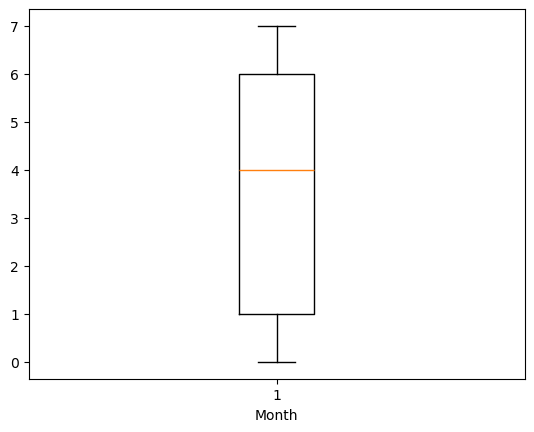

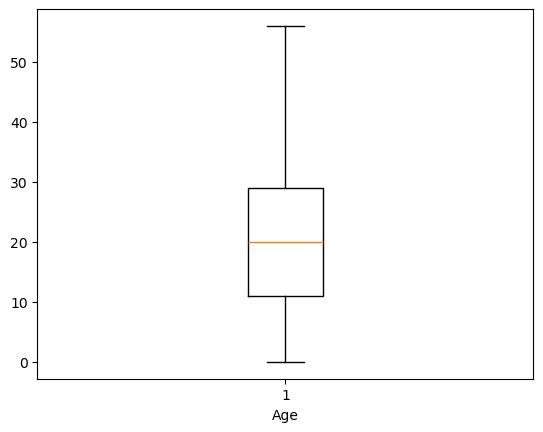

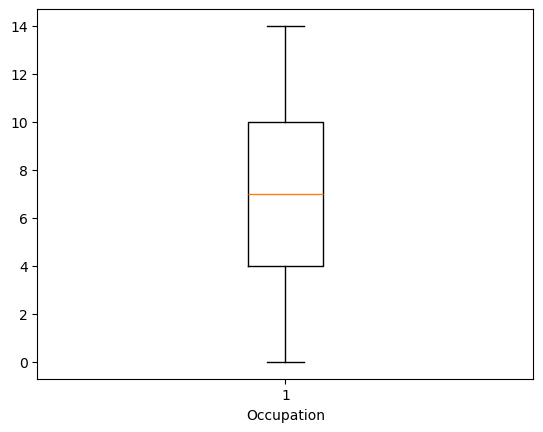

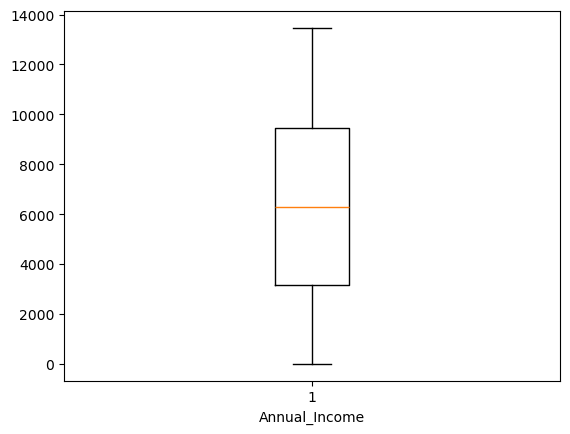

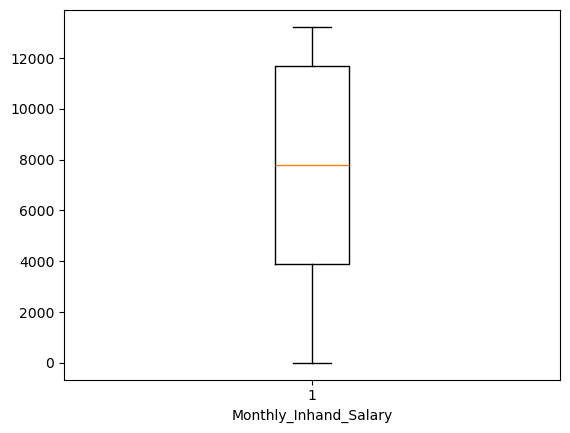

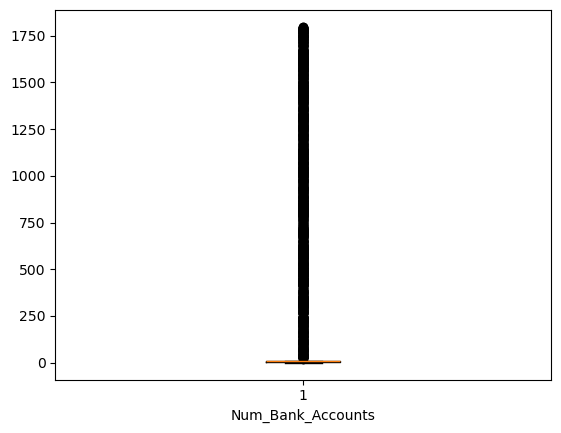

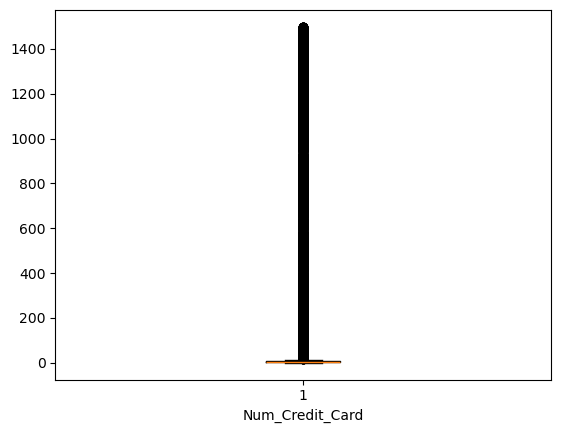

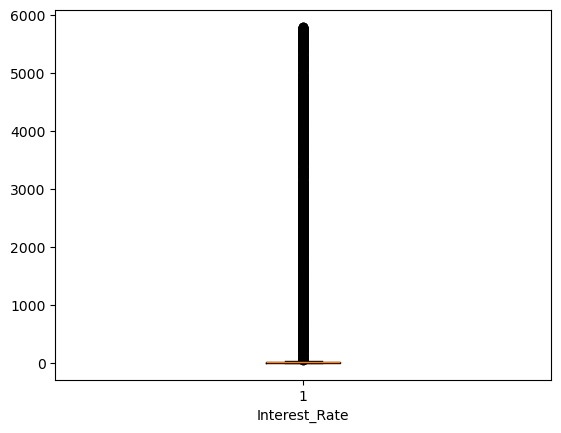

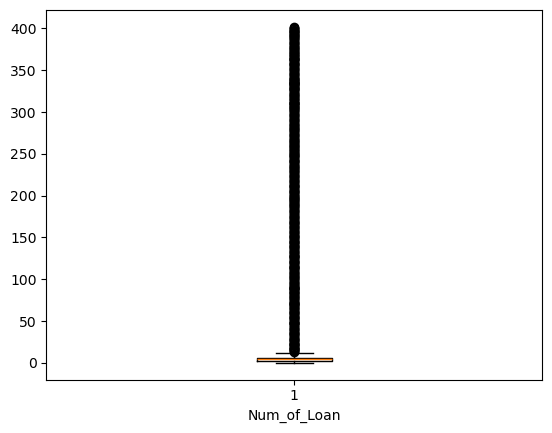

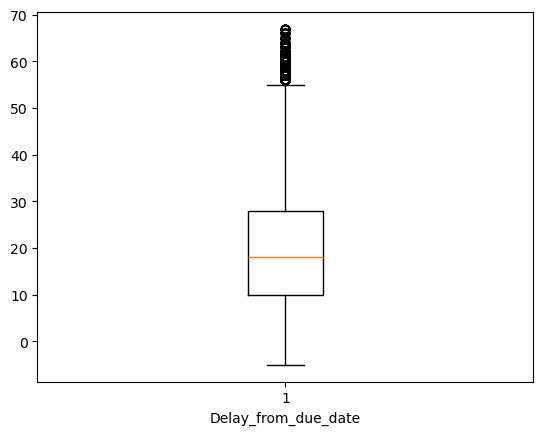

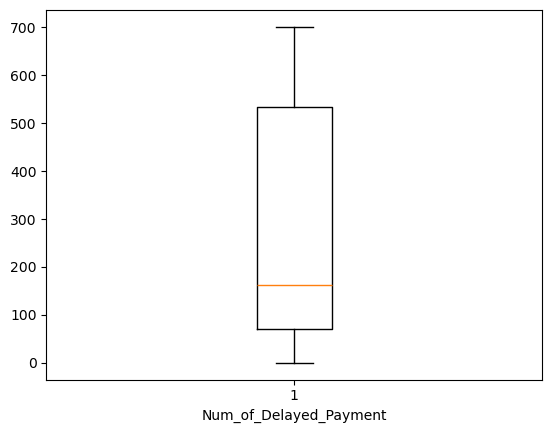

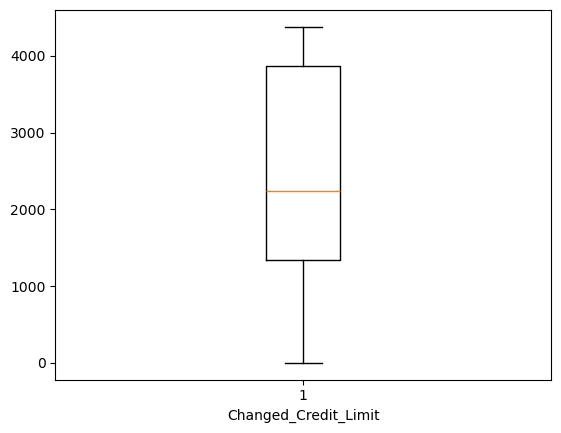

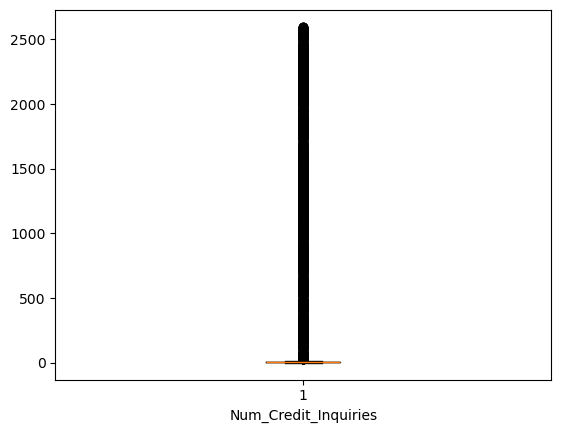

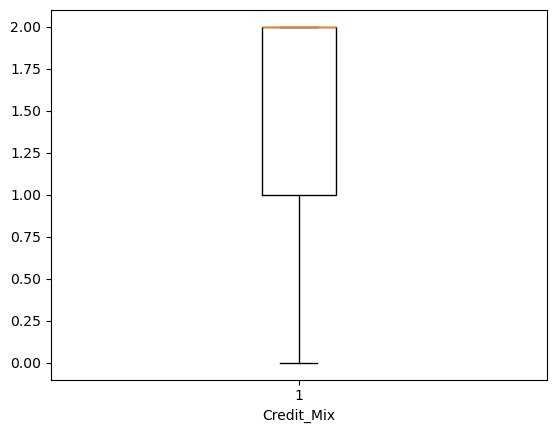

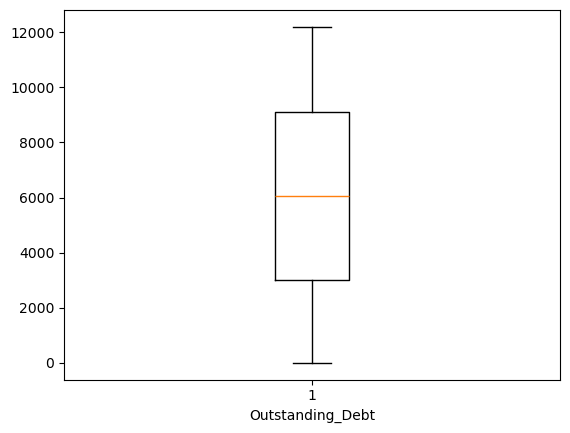

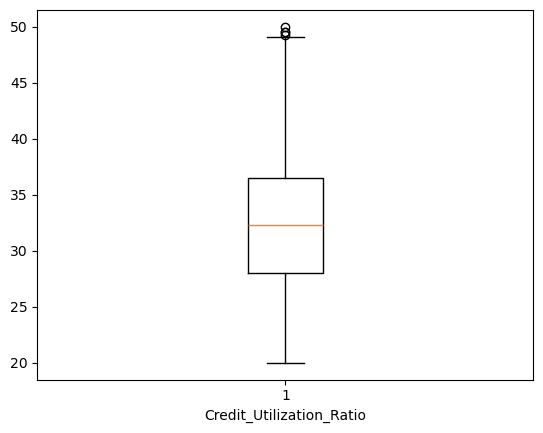

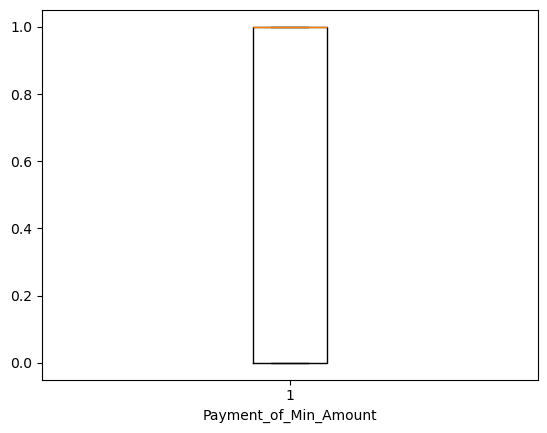

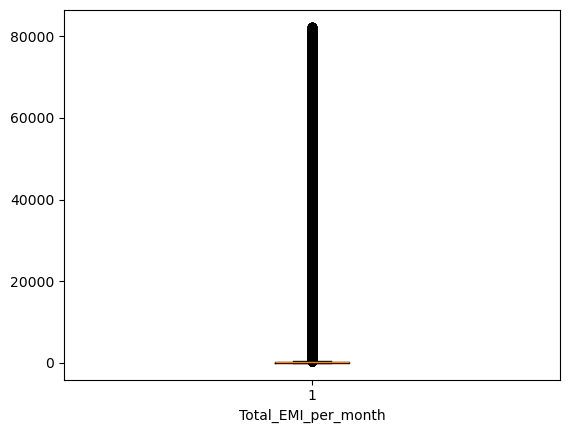

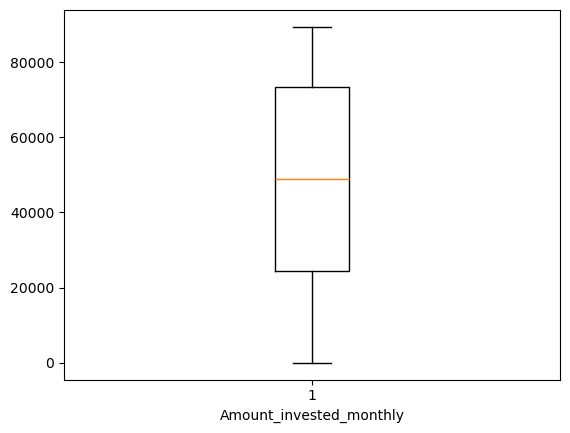

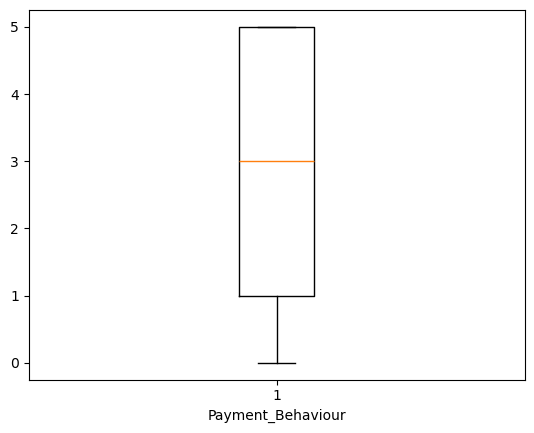

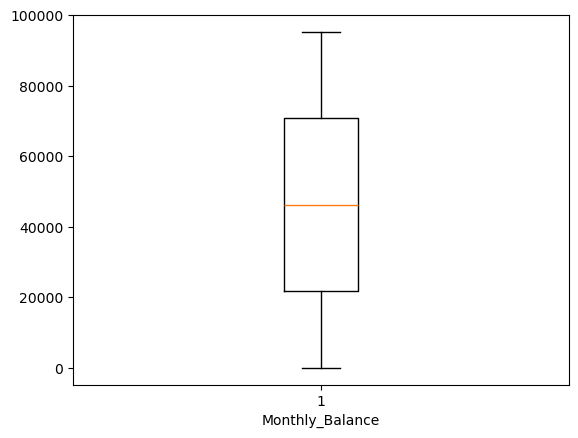

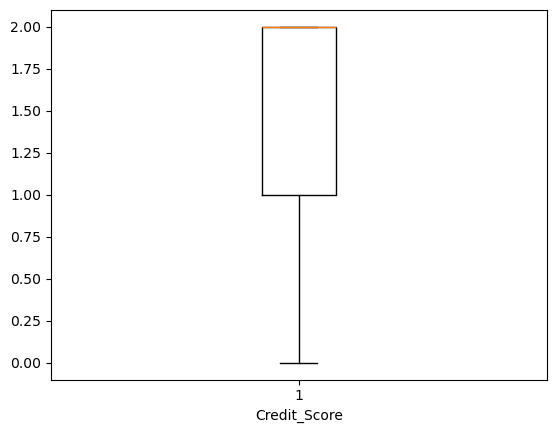

In [59]:
for i in df:  
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [60]:
q1 = np.quantile(df['Age'], 0.25)
q3 = np.quantile(df['Age'], 0.75)
iqr = q3 - q1
    
# Calculate the upper and lower fences
lower_fen = q1 - 1.5 * iqr
upper_fen = q3 + 1.5 * iqr
    
# Remove outliers
df['Age'] = df['Age'].where((df['Age'] >= lower_fen) & (df['Age'] <= upper_fen))

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV  

In [62]:
# divide our data into dependent and independent data   

x=df.drop(columns='Credit_Score') 
y=df['Credit_Score']

In [63]:
x = SS.fit_transform(x)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [66]:
df.dropna(inplace=True)

In [67]:
LR.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred = LR.predict(x_test)

In [69]:
Error = pd.DataFrame({'Actual Value':y_test, 'predict Value':y_pred})
Error

,Actual Value,predict Value
6724,2,2
19232,1,2
42612,0,0
82246,1,2
77066,2,2
...,...,...
53419,2,2
69656,2,2
57405,2,2
99533,1,1


In [73]:
LR_accuracy = accuracy_score(y_pred, y_test)
LR_accuracy

0.603189971463514

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier 

In [75]:
DTC = DecisionTreeClassifier()

In [76]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
DTC_y_pred = DTC.predict(x_test)

In [78]:
DTC_Error = pd.DataFrame({'Actual_value':y_test, 'predict_value':DTC_y_pred})  
DTC_Error

,Actual_value,predict_value
6724,2,2
19232,1,1
42612,0,0
82246,1,1
77066,2,2
...,...,...
53419,2,2
69656,2,2
57405,2,2
99533,1,1


In [79]:
DTC_accuracy = accuracy_score(DTC_y_pred, y_test) 
DTC_accuracy

0.6633204239706482

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
RFC = RandomForestClassifier()

In [82]:
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
RFC_y_pred = RFC.predict(x_test)

In [84]:
RFC_Error = pd.DataFrame({'Actual_value':y_test, 'predict_value':RFC_y_pred})
RFC_Error

,Actual_value,predict_value
6724,2,2
19232,1,1
42612,0,0
82246,1,1
77066,2,2
...,...,...
53419,2,2
69656,2,2
57405,2,2
99533,1,1


In [85]:
RFC_accuracy = accuracy_score(RFC_y_pred, y_test)
RFC_accuracy

0.7758866693844272

### lets use grid search cv for further optimization on Decision Tree Classifier

In [100]:
DTC_Prama_Grid = {
    'criterion': ['gini','entropy'],
    'max_depth':[7,9,11],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[6,7,8,9],
    'random_state':[42, 60, 100]}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
GSCV = GridSearchCV

In [103]:
DTC_GSCV = GSCV(estimator= DTC, param_grid = DTC_Prama_Grid, cv = 2)

In [132]:
DTC_GSCV.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_leaf': [6, 7, 8, 9],
                         'min_samples_split': [3, 4, 5],
                         'random_state': [42, 60, 100]})

In [133]:
DTC_GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'random_state': 42}

In [134]:
Final_DTC = DecisionTreeClassifier(
 criterion = 'gini',
 max_depth = 7,
 min_samples_leaf = 7,
 min_samples_split =3,
 random_state = 42)

In [135]:
Final_DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=3,
                       random_state=42)

In [136]:
Final_DTC_pred = Final_DTC.predict(x_test)

In [137]:
Final_DTC_Acc = accuracy_score(y_test, Final_DTC_pred)
Final_DTC_Acc

0.6971565430085609

### lets use grid search cv for further optimization on Random Forest Classifier

In [138]:
RFC_Params = {  
    'n_estimators':[100,150,200],
    'criterion':['gini', 'entorpy'],
    'max_depth':[2,3,4],
    'min_samples_split':[7,9,11],
    'min_samples_leaf':[5,7,9],
    'random_state':[42, 50, 150]}

In [139]:
RFC_GSCV = GSCV(estimator = RFC, param_grid = RFC_Params, cv=2)

In [140]:
RFC_GSCV.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [7, 9, 11],
                         'n_estimators': [100, 150, 200],
                         'random_state': [42, 50, 150]})

In [141]:
RFC_GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 100,
 'random_state': 42}

In [142]:
Final_RFC = RandomForestClassifier(
criterion='gini',
max_depth=4,
min_samples_leaf=5,
min_samples_split=7,
n_estimators=100,
random_state=42)


In [144]:
Final_RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=7,
                       random_state=42)

In [145]:
Final_RFC_pred = Final_RFC.predict(x_test)

In [147]:
Final_RFC_Acc = accuracy_score(y_test, Final_RFC_pred)

In [148]:
Final_RFC_Acc

0.6504280472890338

### Apply AdaBoostClassifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
ADC = AdaBoostClassifier()

In [112]:
ADC.fit(x_train, y_train)

AdaBoostClassifier()

In [113]:
ADC_pred = ADC.predict(x_test)

In [115]:
ADC_Acc = accuracy_score(ADC_pred, y_test)
ADC_Acc

0.6440073379535263

### Apply GradientBoostingClassifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
GDC = GradientBoostingClassifier()

In [118]:
GDC.fit(x_train, y_train)

GradientBoostingClassifier()

In [119]:
GDC_pred = GDC.predict(x_test)

In [120]:
GDC_Acc = accuracy_score(y_test, GDC_pred)
GDC_Acc 

0.6953730126375867

### Apply XGBClassifier

In [122]:
from xgboost import XGBClassifier

In [123]:
XGB = XGBClassifier()

In [124]:
XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [127]:
XGB_pred= XGB.predict(x_test)

In [130]:
XGB_Acc = accuracy_score(y_test, XGB_pred)
XGB_Acc

0.7452099470036689

In [156]:
Final_Output = pd.DataFrame({
'Model':['Logistic Regression', 
        'Decision Tree Classifier', 
        'Final Decision Tree Classifier',
        'Random Forest Classifier',
        'Final Random Forest Classifier',
        'AdaBoostClassifier',
        'GradientBoostingClassifier',
        'XGBClassifier'],

'Accuracy_Score':[LR_accuracy, DTC_accuracy, Final_DTC_Acc, RFC_accuracy, Final_RFC_Acc, ADC_Acc, GDC_Acc, XGB_Acc]})

In [159]:
Final_Output.sort_values(by = 'Accuracy_Score',ascending=False)

,Model,Accuracy_Score
3,Random Forest Classifier,0.775887
7,XGBClassifier,0.745210
2,Final Decision Tree Classifier,0.697157
6,GradientBoostingClassifier,0.695373
1,Decision Tree Classifier,0.663320
4,Final Random Forest Classifier,0.650428
5,AdaBoostClassifier,0.644007
0,Logistic Regression,0.603190


In [ ]:
# Highest Aaccuracy Score Given By Random Forest Classifier	0.775887 